In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix,accuracy_score,recall_score,precision_score,cohen_kappa_score, f1_score,log_loss

from warnings import filterwarnings
filterwarnings('ignore')


In [5]:
df1=pd.read_csv('Heart_disease.csv')
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df1.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [9]:
df1.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [19]:
df1.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [23]:
#imputing

mode_imputer=SimpleImputer(strategy='most_frequent')
median_imputer=SimpleImputer(strategy='median')
df1['education']=mode_imputer.fit_transform(df1[['education']])

In [24]:
df1['cigsPerDay']=median_imputer.fit_transform(df1[['cigsPerDay']])

In [27]:
df1['totChol'] = median_imputer.fit_transform(df1[['totChol']])
df1['glucose'] = median_imputer.fit_transform(df1[['glucose']])
df1['BMI'] = median_imputer.fit_transform(df1[['BMI']])
df1['heartRate'] = median_imputer.fit_transform(df1[['heartRate']])
df1['BPMeds'] = mode_imputer.fit_transform(df1[['BPMeds']])

In [29]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [32]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.0000,0.0,1.0000,1.0
age,4240.0,49.580189,8.572942,32.00,42.0000,49.0,56.0000,70.0
education,4240.0,1.955189,1.018522,1.00,1.0000,2.0,3.0000,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.0000,0.0,1.0000,1.0
cigsPerDay,4240.0,8.944340,11.904777,0.00,0.0000,0.0,20.0000,70.0
BPMeds,4240.0,0.029245,0.168513,0.00,0.0000,0.0,0.0000,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.0000,0.0,0.0000,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.0000,0.0,1.0000,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.0000,0.0,0.0000,1.0
totChol,4240.0,236.667689,44.328480,107.00,206.0000,234.0,262.0000,696.0


In [34]:
df1.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [36]:
cat_cols = ['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for i in cat_cols:
    df1[i]=df1[i].astype(object)
df1.dtypes

male                object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [39]:
num_col=list(df1.drop(columns='CVD').select_dtypes(include=np.number).columns)
num_col

['age',
 'education',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [45]:
df_target=df1['CVD']

In [43]:
df_num=df1[num_col]

In [46]:
df_cat=df1[cat_cols]

In [48]:
df_target.head()

0    0
1    0
2    0
3    1
4    0
Name: CVD, dtype: int64

<Figure size 2000x1500 with 0 Axes>

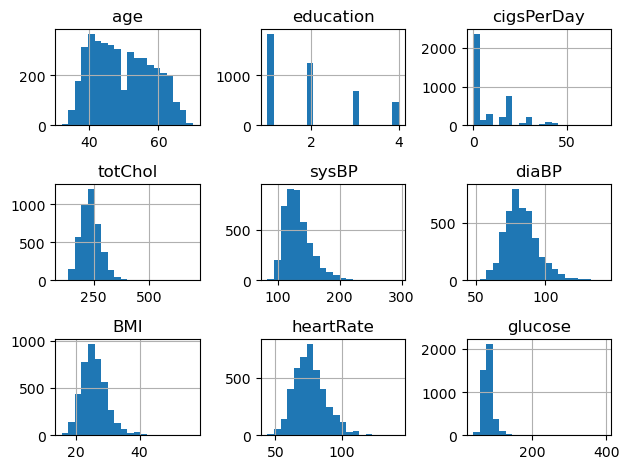

In [57]:
plt.figure(figsize=(20,15))
df_num.hist(bins=20)
plt.tight_layout()
plt.show()  

In [62]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True)

In [64]:
dummy_var

,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,True,False,False,False,False,False
1,False,False,False,False,False,False
2,True,True,False,False,False,False
3,False,True,False,False,True,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
4235,False,True,False,False,False,False
4236,False,True,False,False,False,False
4237,False,False,False,False,False,False
4238,True,False,False,False,True,False


In [67]:
x_scaler=StandardScaler()
num_scaled=x_scaler.fit_transform(df_num)
df_num_scaled=pd.DataFrame(num_scaled,columns=df_num.columns)
df_num_scaled

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234283,2.007862,-0.751412,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287
1,-0.417664,0.044002,-0.751412,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036
2,-0.184345,-0.937929,0.928784,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530
3,1.332233,1.025932,1.768882,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188
4,-0.417664,1.025932,1.180813,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705
...,...,...,...,...,...,...,...,...,...
4235,-0.184345,0.044002,0.928784,0.255674,-0.061487,-0.915087,-0.933349,0.675501,0.192455
4236,-0.650984,-0.937929,0.508735,-0.601664,-0.265747,0.344466,-1.631087,0.841856,-0.157538
4237,0.282295,0.044002,-0.751412,0.729466,0.051991,0.008585,-1.063561,0.342792,1.111184
4238,-1.117623,1.025932,-0.751412,-1.165702,0.392425,1.268138,-0.048892,-0.738512,-0.420032


In [70]:
x=pd.concat([df_num_scaled,dummy_var],axis=1)

In [73]:
x

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,-1.234283,2.007862,-0.751412,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287,True,False,False,False,False,False
1,-0.417664,0.044002,-0.751412,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036,False,False,False,False,False,False
2,-0.184345,-0.937929,0.928784,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530,True,True,False,False,False,False
3,1.332233,1.025932,1.768882,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188,False,True,False,False,True,False
4,-0.417664,1.025932,1.180813,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.184345,0.044002,0.928784,0.255674,-0.061487,-0.915087,-0.933349,0.675501,0.192455,False,True,False,False,False,False
4236,-0.650984,-0.937929,0.508735,-0.601664,-0.265747,0.344466,-1.631087,0.841856,-0.157538,False,True,False,False,False,False
4237,0.282295,0.044002,-0.751412,0.729466,0.051991,0.008585,-1.063561,0.342792,1.111184,False,False,False,False,False,False
4238,-1.117623,1.025932,-0.751412,-1.165702,0.392425,1.268138,-0.048892,-0.738512,-0.420032,True,False,False,False,True,False


In [77]:

class_dist=df_target.value_counts(normalize=True)*100
class_dist

CVD
0    84.811321
1    15.188679
Name: proportion, dtype: float64

<Axes: xlabel='CVD', ylabel='count'>

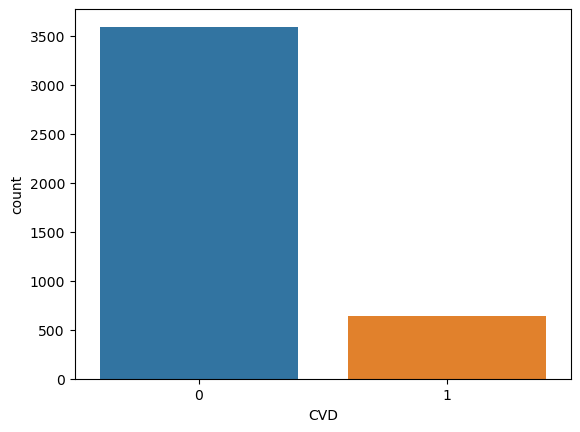

In [80]:
sns.countplot(x=df_target)

In [87]:
features = ['diaBP', 'sysBP', 'BPMeds_1.0']
target = 'CVD'
y=df_target

In [85]:

x_dia=x[features]
x_dia

,diaBP,sysBP,BPMeds_1.0
0,-1.083027,-1.196267,False
1,-0.159355,-0.515399,False
2,-0.243325,-0.220356,False
3,1.016227,0.800946,False
4,0.092555,-0.106878,False
...,...,...,...
4235,-0.915087,-0.061487,False
4236,0.344466,-0.265747,False
4237,0.008585,0.051991,False
4238,1.268138,0.392425,False


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x_dia,y,test_size=.2,random_state=42)

In [93]:
model=LogisticRegression(random_state=42)


model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [96]:

y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
confusion_matrix(y_test,y_pred)

array([[722,   3],
       [121,   2]], dtype=int64)

In [101]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.92       725\n           1       0.40      0.02      0.03       123\n\n    accuracy                           0.85       848\n   macro avg       0.63      0.51      0.48       848\nweighted avg       0.79      0.85      0.79       848\n'

In [112]:
x.dtypes



age                  float64
education            float64
cigsPerDay           float64
totChol              float64
sysBP                float64
diaBP                float64
BMI                  float64
heartRate            float64
glucose              float64
male_1                  bool
currentSmoker_1         bool
BPMeds_1.0              bool
prevalentStroke_1       bool
prevalentHyp_1          bool
diabetes_1              bool
dtype: object

In [113]:
cat_column1=list(x.select_dtypes(include='bool').columns)
cat_column1

['male_1',
 'currentSmoker_1',
 'BPMeds_1.0',
 'prevalentStroke_1',
 'prevalentHyp_1',
 'diabetes_1']

In [115]:
xupdate=x[cat_column1]
xupdate

,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,True,False,False,False,False,False
1,False,False,False,False,False,False
2,True,True,False,False,False,False
3,False,True,False,False,True,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
4235,False,True,False,False,False,False
4236,False,True,False,False,False,False
4237,False,False,False,False,False,False
4238,True,False,False,False,True,False


In [117]:
x_train,x_test,y_train,y_test=train_test_split(xupdate,y,test_size=0.2,random_state=42)

In [130]:
model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)
dp=model.predict(x_test)
confusion_matrix(y_test,dp)
print(classification_report(y_test,dp))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.43      0.02      0.05       123

    accuracy                           0.85       848
   macro avg       0.64      0.51      0.48       848
weighted avg       0.80      0.85      0.79       848



In [132]:
fn=list(model.feature_names_in_)
fn

['male_1',
 'currentSmoker_1',
 'BPMeds_1.0',
 'prevalentStroke_1',
 'prevalentHyp_1',
 'diabetes_1']

In [135]:
coff=model.coef_.flatten()
coff

array([0.41128107, 0.18361175, 0.43622404, 1.07008193, 0.95216062,
       0.9562054 ])

In [140]:
feature_names = list(model.feature_names_in_)
import numpy as np
coefficients = model.coef_.flatten()

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': pd.Series(coefficients).apply(lambda x: np.exp(x))
})

print("\nFeature Coefficients and Odds Ratios:")
print(coef_df)


Feature Coefficients and Odds Ratios:
             Feature  Coefficient  Odds Ratio
0             male_1     0.411281    1.508749
1    currentSmoker_1     0.183612    1.201549
2         BPMeds_1.0     0.436224    1.546855
3  prevalentStroke_1     1.070082    2.915618
4     prevalentHyp_1     0.952161    2.591302
5         diabetes_1     0.956205    2.601805


In [143]:
hyp_col= ['prevalentHyp_1']
x2 = x[hyp_col]


In [146]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[725   0]
 [123   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



In [149]:
feature_names = list(model.feature_names_in_)

coefficients = model.coef_.flatten()

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': pd.Series(coefficients).apply(lambda x: np.exp(x))
})

print("\nFeature Coefficients and Odds Ratios:")
print(coef_df)


Feature Coefficients and Odds Ratios:
          Feature  Coefficient  Odds Ratio
0  prevalentHyp_1     1.006238     2.73529


In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[717   8]
 [114   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.53      0.07      0.13       123

    accuracy                           0.86       848
   macro avg       0.70      0.53      0.53       848
weighted avg       0.81      0.86      0.81       848



In [155]:
X_encoded = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
logit_model = sm.Logit(y_train, x_train).fit()

print(logit_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).